5200939168077557172
this node has 1 children
move:(8, 1), runs:117079999, eval:-1.0000, principal:81 65 16 50 71 34 13 41 35 27 75 36 01 25 87 84 63 12 57 85 88 77 

81 65 16 50 71 34 13 41 35 27 75 36 01 25 87 84 63 12 57 85 88 77 44 33 21 83 06 11 51 74 31 14 32 


KeyboardInterrupt: 

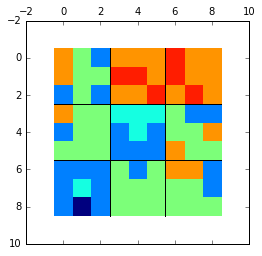

In [1]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import MC
from MC import MC_node,mc_sim
from tictactics_policy import tictactics_simulation_policy as sim_pol
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,0),(0,4),(2,4),(0,8),(2,8),(4,3),(4,5)]:
    board[x]=1
for o in [(6,0),(7,0),(5,4),(5,5),(6,4),(6,8),(7,8),]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(1,0),(4,0),(3,0),(2,0),(8,0),(6,1),(0,5),(1,8),(4,8),(3,7),(0,3),(2,2),(6,7),(1,5),(5,6),(6,2),
             (0,7),(2,3),(7,2),(3,8),(2,6),(8,2),(6,6),(0,2),(1,7),(5,3)]:
    game.update_move(move)
log_len = len(game.log)

root = MC_node(game,1)

tact.fancy_board(game)

# cProfile.run('mc_sim(root,game,branch = 50,passes = 1000000,eval_fun = None)',sort = 'tottime')
mc_sim(root,game,branch = 50,passes = 1000000000,eval_fun = sim_pol)

nodes visited   358848738
cache space     30000034
nodes stored    29987686
nodes forgotten 189484860
current depth   0
current node    
role: min
  root: work: 143304831 pn0:    INF pn1:    INF dn0:      0 dn1:      0 

role: max
(8, 1): work:  18253012 pn0:   3260 pn1:   1929 dn0:   7757 dn1:   7821 
(6, 2): work:  81497630 pn0:    INF pn1:    INF dn0:      0 dn1:      0 
(8, 2): work:  22227603 pn0:   4021 pn1:   3608 dn0:   7767 dn1:   7767 
(7, 1): work:  21326585 pn0:   4008 pn1:   3265 dn0:   7792 dn1:   7797 

time 2639.38498549
(6, 2)
	(0, 6)(0, 1)
		(1, 3)(5, 0)
			(7, 1)(3, 4)
				(2, 3)(8, 2)
				(2, 5)(8, 6)
			(7, 2)(3, 6)
				(0, 2)(2, 6)
				(1, 1)(5, 3)
				(2, 1)(8, 3)
			(8, 1)(6, 5)
				(0, 7)(2, 3)
				(1, 6)(5, 2)
				(1, 7)(5, 3)
				(2, 6)(7, 2)
			(8, 2)(8, 8)
				(6, 6)(1, 2)
				(7, 6)(3, 2)
				(7, 7)(5, 3)
				(8, 6)(7, 1)
				(8, 7)(6, 3)
		(1, 4)(5, 3)
			(7, 2)(4, 7)
				(3, 3)(2, 1)
				(3, 4)(2, 3)
				(3, 5)(2, 6)
				(4, 4)(3, 4)
			(8, 1)(7, 4)
				

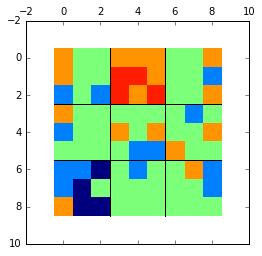

In [1]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import dfpn_multi as dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,0),(0,4),(2,4),(0,8),(2,8),(4,3),(4,5)]:
    board[x]=1
for o in [(6,0),(7,0),(5,4),(5,5),(6,4),(6,8),(7,8),]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(1,0),(4,0),(3,0),(2,0),(8,0),(6,1),(0,5),(1,8),(4,8),(3,7),(0,3),(2,2),(6,7),(1,5),(5,6),(6,2)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()




tact.fancy_board(game)
t0 = time.clock()
# cProfile.run('node,tree = dfpn.solve(game,root = True,epsilon=1.1)',sort = 'tottime')
node,tree = dfpn.solve(game,3,{1:0,0:1,-1:2,2:1,-2:1},0,root = True,epsilon=1.02)
print 'time',time.clock() - t0
print tree

nodes visited   169
cache space     30000034
nodes stored    113
nodes forgotten 0
current depth   0
current node    
role: min
  root: work:        53 pn0:    INF pn1:    INF dn0:      0 dn1:      0 

role: max
(7, 3): work:         5 pn0:      1 pn1:      1 dn0:      7 dn1:      7 
(8, 3): work:         1 pn0:      1 pn1:      1 dn0:     22 dn1:     22 
(7, 4): work:         3 pn0:      1 pn1:      1 dn0:     26 dn1:     26 
(6, 3): work:         4 pn0:      1 pn1:      1 dn0:      5 dn1:      5 
(7, 5): work:        27 pn0:    INF pn1:    INF dn0:      0 dn1:      0 
(8, 5): work:        11 pn0:      3 pn1:      3 dn0:      6 dn1:      6 
(8, 4): work:         1 pn0:      1 pn1:      1 dn0:      6 dn1:      6 

time 0.00276047275838
(7, 5)
	(3, 6)(0, 1)
		(1, 4)(4, 4)
			(3, 3)(1, 2)
				(4, 6)(4, 1)
				(5, 7)(6, 3)
				(5, 8)(7, 7)
	(4, 6)(3, 2)
		(0, 6)(0, 1)
			(1, 4)(4, 4)
				(3, 3)(1, 2)
	(5, 8)(8, 8)
		(7, 6)(3, 2)
			(0, 6)(1, 1) p2win
		(7, 7)(4, 4)
			(3, 3)(1, 2) p2win
	

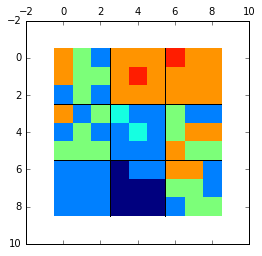

In [17]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import dfpn_multi as dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,0),(0,4),(2,4),(0,8),(2,8),(4,3),(4,5)]:
    board[x]=1
for o in [(6,0),(7,0),(5,4),(5,5),(6,4),(6,8),(7,8),]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(1,0),(4,0),(3,0),(2,0),(8,0),(6,1),(0,5),(1,8),(4,8),(3,7),(0,3),(2,2),(6,7),(1,5),(5,6),(6,2),
             (0,7),(2,3),(7,2),(3,8),(2,6),(8,2),(6,6),(0,2),(1,7),(5,3),(8,1),(6,5),(1,6),(3,1),(2,5),(8,6),
             (7,1),(3,4),(1,3),(4,2),(4,7),(3,5),(2,7)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()




tact.fancy_board(game)
t0 = time.clock()
# cProfile.run('node,tree = dfpn.solve(game,root = True,epsilon=1.1)',sort = 'tottime')
node,tree = dfpn.solve(game,3,{1:0,0:1,-1:2,2:1,-2:1},0,root = True,epsilon=1.02)
print 'time',time.clock() - t0
print tree

In [ ]:
cd 